# Getting started with the SFPD data

In [41]:
# Getting relevant packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import urllib2
from collections import Counter 
import numpy as np
from operator import itemgetter
from scipy import linalg
import geoplotlib as gpl
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Importing data using pandas
crime_data = pd.read_csv('SFPD_Incidents_Jan_2003.csv') # Updated 20th of February

### Initial work on data

In [3]:
# Show the resulting crime data
crime_data

IncidntNum         Category  \
0         150060275     NON-CRIMINAL   
1         150098210          ROBBERY   
2         150098210          ASSAULT   
3         150098210  SECONDARY CODES   
4         150098226        VANDALISM   
5         150098232     NON-CRIMINAL   
6         150098248  SECONDARY CODES   
7         150098248        VANDALISM   
8         150098254         BURGLARY   
9         150098260    LARCENY/THEFT   
10        150098345    LARCENY/THEFT   
11        150098345    DRUG/NARCOTIC   
12        150098345    DRUG/NARCOTIC   
13        150098345         WARRANTS   
14        150098367          ROBBERY   
15        150098373    VEHICLE THEFT   
16        150098373     NON-CRIMINAL   
17        150098389         WARRANTS   
18        150098395    LARCENY/THEFT   
19        150098408   OTHER OFFENSES   
20        150098414          ROBBERY   
21        150098414          ROBBERY   
22        150098414          ASSAULT   
23        150098414          ASSAULT   
24        150098420          ROBBERY   
25        150098420          ASSAULT   
26        150098420      WEAPON LAWS   
27        150098436     NON-CRIMINAL   
28        150098442   OTHER OFFENSES   
29        150098458          ASSAULT   
...             ...              ...   
2026943   160228015          ASSAULT   
2026944   160236212          ASSAULT   
2026945   160314755          ASSAULT   
2026946   160321017          ASSAULT   
2026947   160380916          ASSAULT   
2026948   160412183          ASSAULT   
2026949   160454129          ASSAULT   
2026950   160558066          ASSAULT   
2026951   160580207          ASSAULT   
2026952   160598385          ASSAULT   
2026953   160600463          ASSAULT   
2026954   160650446          ASSAULT   
2026955   160673410          ASSAULT   
2026956   160698797          ASSAULT   
2026957   160757729          ASSAULT   
2026958   160774137          ASSAULT   
2026959   160778991          ASSAULT   
2026960   160843920          ASSAULT   
2026961   160857993    VEHICLE THEFT   
2026962   160875832          ASSAULT   
2026963   160907300          ASSAULT   
2026964   166271975     NON-CRIMINAL   
2026965   166280675     NON-CRIMINAL   
2026966   169004460            FRAUD   
2026967    90578136    VEHICLE THEFT   
2026968   981021761         WARRANTS   
2026969    81076498   MISSING PERSON   
2026970   961392021   MISSING PERSON   
2026971   961392021     NON-CRIMINAL   
2026972   990340112     NON-CRIMINAL   

                                          Descript  DayOfWeek        Date  \
0                                    LOST PROPERTY     Monday  01/19/2015   
1                            ROBBERY, BODILY FORCE     Sunday  02/01/2015   
2             AGGRAVATED ASSAULT WITH BODILY FORCE     Sunday  02/01/2015   
3                                DOMESTIC VIOLENCE     Sunday  02/01/2015   
4        MALICIOUS MISCHIEF, VANDALISM OF VEHICLES    Tuesday  01/27/2015   
5             AIDED CASE -PROPERTY FOR DESTRUCTION     Sunday  02/01/2015   
6                                DOMESTIC VIOLENCE   Saturday  01/31/2015   
7                    MALICIOUS MISCHIEF, VANDALISM   Saturday  01/31/2015   
8                BURGLARY OF STORE, UNLAWFUL ENTRY   Saturday  01/31/2015   
9                          PETTY THEFT SHOPLIFTING   Saturday  01/31/2015   
10                         PETTY THEFT SHOPLIFTING     Sunday  02/01/2015   
11                  POSSESSION OF METH-AMPHETAMINE     Sunday  02/01/2015   
12           POSSESSION OF NARCOTICS PARAPHERNALIA     Sunday  02/01/2015   
13                                  WARRANT ARREST     Sunday  02/01/2015   
14                     ROBBERY, ARMED WITH A KNIFE     Sunday  02/01/2015   
15                               STOLEN AUTOMOBILE     Sunday  02/01/2015   
16                                  FOUND PROPERTY     Sunday  02/01/2015   
17                 ENROUTE TO OUTSIDE JURISDICTION     Sunday  02/01/2015   
18                    PETTY THEFT FROM LOCKED AUTO     Sunday  02

In [4]:
print "Crimes in all:", len(crime_data)

Crimes in all: 2026973


In [5]:
# Extract set of crime categories
crime_categories = set(crime_data.Category)
print "No. of crime categories:", len(crime_categories), "\n", crime_categories

No. of crime categories: 39 
set(['KIDNAPPING', 'WEAPON LAWS', 'SECONDARY CODES', 'WARRANTS', 'LOITERING', 'EMBEZZLEMENT', 'SEX OFFENSES, NON FORCIBLE', 'PORNOGRAPHY/OBSCENE MAT', 'SUICIDE', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'SUSPICIOUS OCC', 'ARSON', 'BRIBERY', 'FORGERY/COUNTERFEITING', 'PROSTITUTION', 'BAD CHECKS', 'DRUNKENNESS', 'GAMBLING', 'OTHER OFFENSES', 'FRAUD', 'RECOVERED VEHICLE', 'SEX OFFENSES, FORCIBLE', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'NON-CRIMINAL', 'EXTORTION', 'LIQUOR LAWS', 'TREA', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'ASSAULT', 'FAMILY OFFENSES', 'MISSING PERSON', 'DISORDERLY CONDUCT', 'RUNAWAY'])


In [6]:
# Count number of occurences of the different categories
crime_count = Counter()
for cat in crime_data.Category:
    crime_count[cat] += 1
crime_count

Counter({'ARSON': 3529,
         'ASSAULT': 177686,
         'BAD CHECKS': 893,
         'BRIBERY': 736,
         'BURGLARY': 84134,
         'DISORDERLY CONDUCT': 9583,
         'DRIVING UNDER THE INFLUENCE': 5308,
         'DRUG/NARCOTIC': 115200,
         'DRUNKENNESS': 9438,
         'EMBEZZLEMENT': 2754,
         'EXTORTION': 670,
         'FAMILY OFFENSES': 1129,
         'FORGERY/COUNTERFEITING': 22361,
         'FRAUD': 38351,
         'GAMBLING': 326,
         'KIDNAPPING': 5079,
         'LARCENY/THEFT': 423109,
         'LIQUOR LAWS': 3996,
         'LOITERING': 2382,
         'MISSING PERSON': 59531,
         'NON-CRIMINAL': 217109,
         'OTHER OFFENSES': 287125,
         'PORNOGRAPHY/OBSCENE MAT': 51,
         'PROSTITUTION': 16164,
         'RECOVERED VEHICLE': 8062,
         'ROBBERY': 51750,
         'RUNAWAY': 4116,
         'SECONDARY CODES': 23299,
         'SEX OFFENSES, FORCIBLE': 10420,
         'SEX OFFENSES, NON FORCIBLE': 378,
         'STOLEN PROPERTY': 10

In [7]:
# Find most common crime
crime_count.most_common(1)

[('LARCENY/THEFT', 423109)]

In [8]:
# Find least common crime
least_common = crime_count.most_common()[-1][0]
print least_common + ":", crime_count[crime_count.most_common()[-1][0]]  

TREA: 13


### Plot of crimes

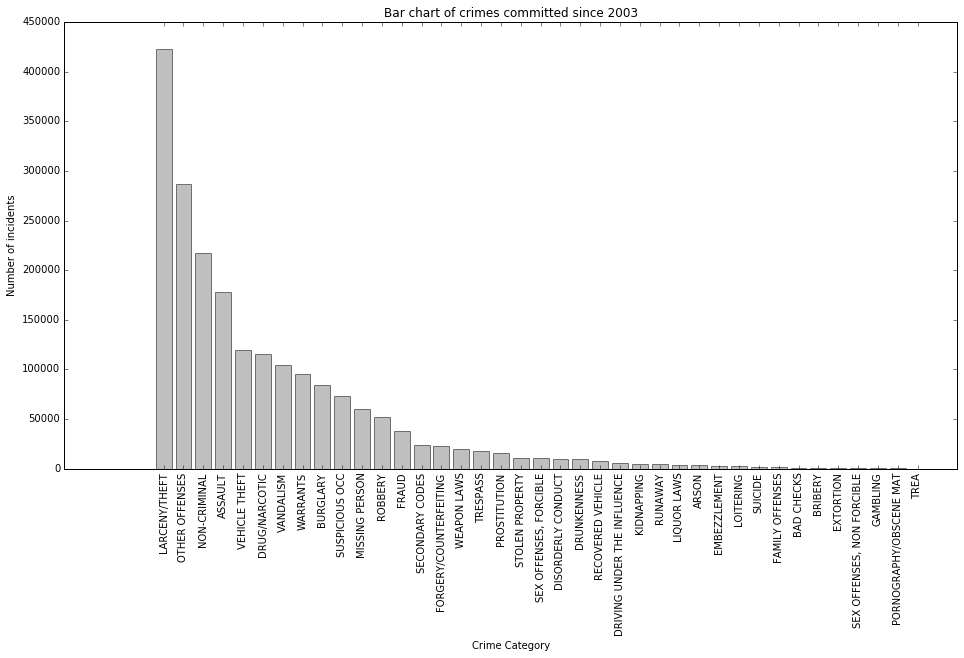

In [9]:
# Plot bar chart of crimes
labels, values = zip(*crime_count.most_common())
indexes = np.arange(len(labels))

fig = plt.figure(figsize=(16,8))
plt.bar(indexes, values, align='center', alpha=0.5, color='grey')
plt.xticks(indexes, labels)
plt.ylabel('Number of incidents')
plt.xlabel('Crime Category')
plt.title('Bar chart of crimes committed since 2003')
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()


### Change over time - crimes committed per year 2003-2016

In [10]:
# get crimes per year
crimePerYear = []
for date in crime_data.Date:
    crimePerYear.append(int(date.split("/")[-1]))

# Append to existing dataframe
crime_data['Year'] = crimePerYear 
crime_data = crime_data.sort_values(by='Year')
crime_data

IncidntNum        Category  \
1013486    31056337    NON-CRIMINAL   
1297565    30511914   VEHICLE THEFT   
761893     31175589  MISSING PERSON   
1297555    30837641           FRAUD   
301353     30614938  OTHER OFFENSES   
761910     31429079   VEHICLE THEFT   
1297532    30915065   LARCENY/THEFT   
301348     31467687  SUSPICIOUS OCC   
1297527    30978950   DRUG/NARCOTIC   
761911     31512840   LARCENY/THEFT   
301346     31477169         ROBBERY   
1297519    31398117    NON-CRIMINAL   
1297515    31066900        BURGLARY   
1297498    31101120   VEHICLE THEFT   
301341     31347346  OTHER OFFENSES   
1297483    30416944   LARCENY/THEFT   
1297481    30823117    NON-CRIMINAL   
1297473    30643040           FRAUD   
1297568    31248227   VEHICLE THEFT   
1297570    30218988   DRUG/NARCOTIC   
1297572    31357351    NON-CRIMINAL   
761882     31431444           FRAUD   
1297704    30748208        WARRANTS   
301380     31126899        BURGLARY   
1297686    31094597  OTHER OFFENSES   
761847     30827410    NON-CRIMINAL   
301377     30883597   LARCENY/THEFT   
1297674    30734978        WARRANTS   
761849     30705606   DRUG/NARCOTIC   
1297665    30880305         ASSAULT   
...             ...             ...   
1970678   170083285        WARRANTS   
1970679   170083285        WARRANTS   
1970680   170083291   LARCENY/THEFT   
1970681   170083291       VANDALISM   
1970682   170083304   LARCENY/THEFT   
1970683   170083326    NON-CRIMINAL   
1970684   170083332       VANDALISM   
1970685   170083348  OTHER OFFENSES   
1970686   170083354         ASSAULT   
1970687   170083376   LARCENY/THEFT   
1970688   170083382         ASSAULT   
1970689   170083398    NON-CRIMINAL   
1970674   170083241   LARCENY/THEFT   
1970690   170083401    NON-CRIMINAL   
1970692   170083423   VEHICLE THEFT   
1970693   170083423   VEHICLE THEFT   
1970694   170083445        WARRANTS   
1970695   170083473   LARCENY/THEFT   
1970696   170083489   VEHICLE THEFT   
1970697   170083495  SUSPICIOUS OCC   
1970698   170083508         ROBBERY   
1970699   170083514   LARCENY/THEFT   
1970700   170083520        BURGLARY   
1970701   170083536  OTHER OFFENSES   
1970702   170083542   LARCENY/THEFT   
1970703   170083558  OTHER OFFENSES   
1970704   170083564   VEHICLE THEFT   
1970705   170083570         ASSAULT   
1970691   170083417  OTHER OFFENSES   
1970482   170081831       VANDALISM   

                                                  Descript  DayOfWeek  \
1013486                                      LOST PROPERTY   Saturday   
1297565                                  STOLEN AUTOMOBILE     Sunday   
761893                                       MISSING ADULT     Monday   
1297555                       CREDIT CARD, THEFT BY USE OF     Monday   
301353                                    RESISTING ARREST    Tuesday   
761910                                        STOLEN TRUCK     Sunday   
1297532                     GRAND THEFT FROM UNLOCKED AUTO     Sunday   
301348                               SUSPICIOUS OCCURRENCE   Thursday   
1297527                    POSSESSION OF BASE/ROCK COCAINE    Tuesday   
761911                         PETTY THEFT FROM A BUILDING    Tuesday   
301346                    ROBBERY ON THE STREET, STRONGARM   Saturday   
1297519                                            SHELTER     Sunday   
1297515              BURGLARY OF RESIDENCE, UNLAWFUL ENTRY    Tuesday   
1297498                                  STOLEN AUTOMOBILE  Wednesday   
301341                           LOST/STOLEN LICENSE PLATE    Tuesday   
1297483                       GRAND THEFT FROM LOCKED AUTO     Sunday   
1297481                                  IMPOUNDED VEHICLE   Thursday   
1297473                       CREDIT CARD, THEFT BY USE OF     Monday   
1297568                                  STOLEN AUTOMOBILE     Friday   
1297570            POSSESSION OF METH-AMPHETAMINE FOR SALE     Friday   
1297572                                      LOST PROPERT

In [11]:
# Count number of crimes per year
year_count = Counter()
for year in crimePerYear:
    year_count[year] += 1

# Find avg number of crimes per year
print "Average number of crimes per year:", len(crime_data)/(2017-2003)

Average number of crimes per year: 144783


In [12]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

### Plotting for the focus crimes on a yearly basis

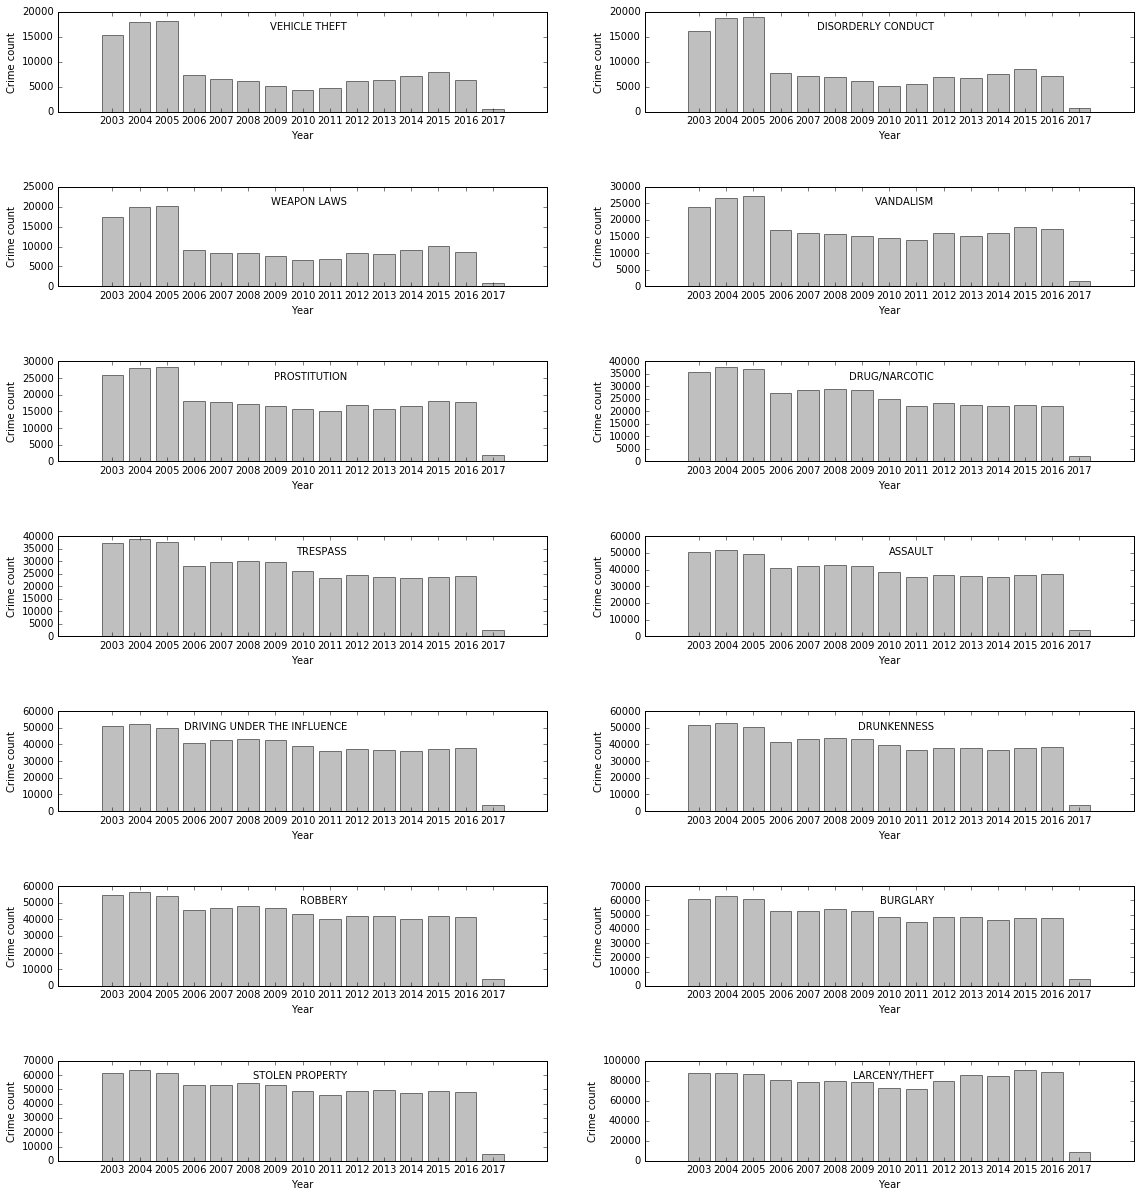

In [85]:
# Create 2 X 7 grid for the 14 crime subplots
# Run through each focus crime, aggregate data and plot on-the-fly

# Initialize variables
y_cnt = Counter()
temp_crime_y = []
plotVar = 1 # plotting variable, keeps track of subplot

# Run through each focus crime category
for crime in focuscrimes:
    # Make data structure with one crime category at a time
    temp_values = crime_data.loc[crime_data['Category'].isin([crime])]
    # Extract year per crime, add to list
    temp_crime_y = temp_values.Year.tolist()
    # Count no of crimes for each year
    for y in temp_crime_y:
        y_cnt[y] += 1
    
    # Sort plot values
    labels, values = zip(*sorted(y_cnt.items()))
    indexes = np.arange(len(labels))
    
    # Add plot variables
    plt.subplot(7, 2, plotVar)
    plt.annotate(crime, xy=(1, 0), xycoords='axes fraction',
                 xytext=(-200, 80), textcoords='offset pixels',
                 horizontalalignment='right',verticalalignment='bottom') # Labels on each plot
    plt.bar(indexes, values, align='center', alpha=0.5, color='grey')
    
    # Plot the results
    plt.xticks(indexes, labels)
    plt.ylabel('Crime count')
    plt.xlabel('Year')
    plt.subplots_adjust(bottom=.01, left=.01, right=2.5, top=4.0, hspace=.75)
    plotVar += 1
    
plt.show()


#### Comment on the plots
>*Note!* 2017 have been included but since we're only in February 2017, this data of course is inconsistent.

* For all categories within the focus crimes, it seems as if the years 2003-2005 had increased numbers of crimes. Why this is is hard to tell only from this data. Maybe, as an effect of the 'engine immobilizer technology' driving under the influence and vandalism can have been positiely effected, but this is a long shot.
* 2010-2011 is definately an all time low for most crimes, why I cannot say.
* Vehicle theft, disorderly conduct and vandalism seem to have peaked in 2015.

### Plotting the number of crimes per hour

In [86]:
# Getting the hour from the crime data
crimePerHour = []
for hour in crime_data.Time:
    crimePerHour.append(int(hour.split(":")[0]))

# Append to existing dataframe
crime_data['Hour'] = crimePerHour 
crime_data

IncidntNum        Category  \
1013486    31056337    NON-CRIMINAL   
1297565    30511914   VEHICLE THEFT   
761893     31175589  MISSING PERSON   
1297555    30837641           FRAUD   
301353     30614938  OTHER OFFENSES   
761910     31429079   VEHICLE THEFT   
1297532    30915065   LARCENY/THEFT   
301348     31467687  SUSPICIOUS OCC   
1297527    30978950   DRUG/NARCOTIC   
761911     31512840   LARCENY/THEFT   
301346     31477169         ROBBERY   
1297519    31398117    NON-CRIMINAL   
1297515    31066900        BURGLARY   
1297498    31101120   VEHICLE THEFT   
301341     31347346  OTHER OFFENSES   
1297483    30416944   LARCENY/THEFT   
1297481    30823117    NON-CRIMINAL   
1297473    30643040           FRAUD   
1297568    31248227   VEHICLE THEFT   
1297570    30218988   DRUG/NARCOTIC   
1297572    31357351    NON-CRIMINAL   
761882     31431444           FRAUD   
1297704    30748208        WARRANTS   
301380     31126899        BURGLARY   
1297686    31094597  OTHER OFFENSES   
761847     30827410    NON-CRIMINAL   
301377     30883597   LARCENY/THEFT   
1297674    30734978        WARRANTS   
761849     30705606   DRUG/NARCOTIC   
1297665    30880305         ASSAULT   
...             ...             ...   
1970678   170083285        WARRANTS   
1970679   170083285        WARRANTS   
1970680   170083291   LARCENY/THEFT   
1970681   170083291       VANDALISM   
1970682   170083304   LARCENY/THEFT   
1970683   170083326    NON-CRIMINAL   
1970684   170083332       VANDALISM   
1970685   170083348  OTHER OFFENSES   
1970686   170083354         ASSAULT   
1970687   170083376   LARCENY/THEFT   
1970688   170083382         ASSAULT   
1970689   170083398    NON-CRIMINAL   
1970674   170083241   LARCENY/THEFT   
1970690   170083401    NON-CRIMINAL   
1970692   170083423   VEHICLE THEFT   
1970693   170083423   VEHICLE THEFT   
1970694   170083445        WARRANTS   
1970695   170083473   LARCENY/THEFT   
1970696   170083489   VEHICLE THEFT   
1970697   170083495  SUSPICIOUS OCC   
1970698   170083508         ROBBERY   
1970699   170083514   LARCENY/THEFT   
1970700   170083520        BURGLARY   
1970701   170083536  OTHER OFFENSES   
1970702   170083542   LARCENY/THEFT   
1970703   170083558  OTHER OFFENSES   
1970704   170083564   VEHICLE THEFT   
1970705   170083570         ASSAULT   
1970691   170083417  OTHER OFFENSES   
1970482   170081831       VANDALISM   

                                                  Descript  DayOfWeek  \
1013486                                      LOST PROPERTY   Saturday   
1297565                                  STOLEN AUTOMOBILE     Sunday   
761893                                       MISSING ADULT     Monday   
1297555                       CREDIT CARD, THEFT BY USE OF     Monday   
301353                                    RESISTING ARREST    Tuesday   
761910                                        STOLEN TRUCK     Sunday   
1297532                     GRAND THEFT FROM UNLOCKED AUTO     Sunday   
301348                               SUSPICIOUS OCCURRENCE   Thursday   
1297527                    POSSESSION OF BASE/ROCK COCAINE    Tuesday   
761911                         PETTY THEFT FROM A BUILDING    Tuesday   
301346                    ROBBERY ON THE STREET, STRONGARM   Saturday   
1297519                                            SHELTER     Sunday   
1297515              BURGLARY OF RESIDENCE, UNLAWFUL ENTRY    Tuesday   
1297498                                  STOLEN AUTOMOBILE  Wednesday   
301341                           LOST/STOLEN LICENSE PLATE    Tuesday   
1297483                       GRAND THEFT FROM LOCKED AUTO     Sunday   
1297481                                  IMPOUNDED VEHICLE   Thursday   
1297473                       CREDIT CARD, THEFT BY USE OF     Monday   
1297568                                  STOLEN AUTOMOBILE     Friday   
1297570            POSSESSION OF METH-AMPHETAMINE FOR SALE     Friday   
1297572                                      LOST PROPERT

In [87]:
# Count crimes per hour
hour_count = Counter()
for hour in crimePerHour:
    hour_count[hour] += 1

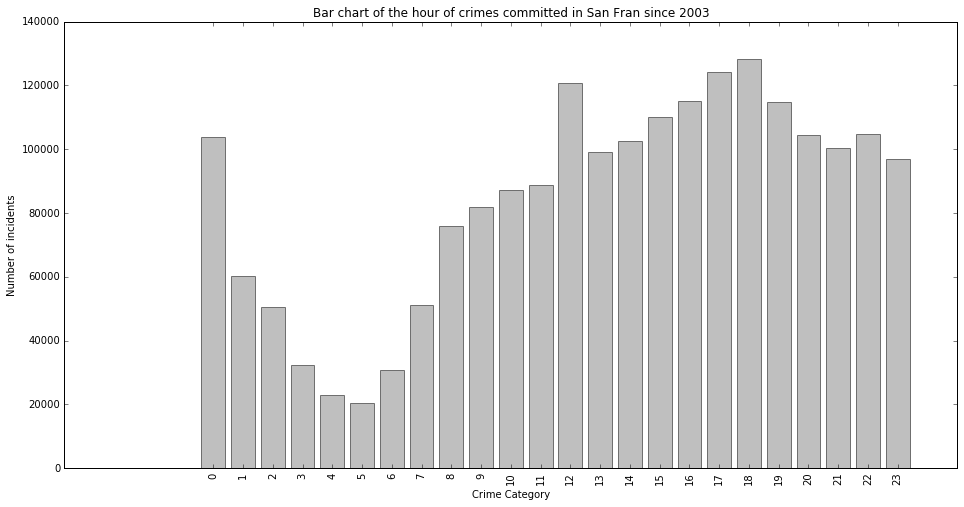

In [88]:
# Plot bar chart of crimes
labels, values = zip(*hour_count.items())
indexes = np.arange(len(labels))

fig = plt.figure(figsize=(16,8))
plt.bar(indexes, values, align='center', alpha=0.5, color='grey')
plt.xticks(indexes, labels)
plt.ylabel('Number of incidents')
plt.xlabel('Crime Category')
plt.title('Bar chart of the hour of crimes committed in San Fran since 2003')
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()


#### Comment on the plot

* Considering the peak at 12 I first thought it was just because it was part of the time where most people are away from home, maybe out for lunch, but I don't feel that this is reason enough to conclude that this is why, especially not since the number of crimes keep rising all the way until 6PM! Are people eating out a lot? *Or maybe they first realize that they have been robbed when they get home (from work etc.)?*
* The quite low number of crimes from 2-7 makes sense since most people are at home, sleeping, and the "crime riders" might even sleep themselves. At least that's what my naïve brain thinks.
* I found [this article](https://www.fastcodesign.com/1664491/infographic-of-the-day-when-do-criminals-prowl-the-streets) describing different theories on when and why different crimes occur at the time they to for some states in the US, an easy read..

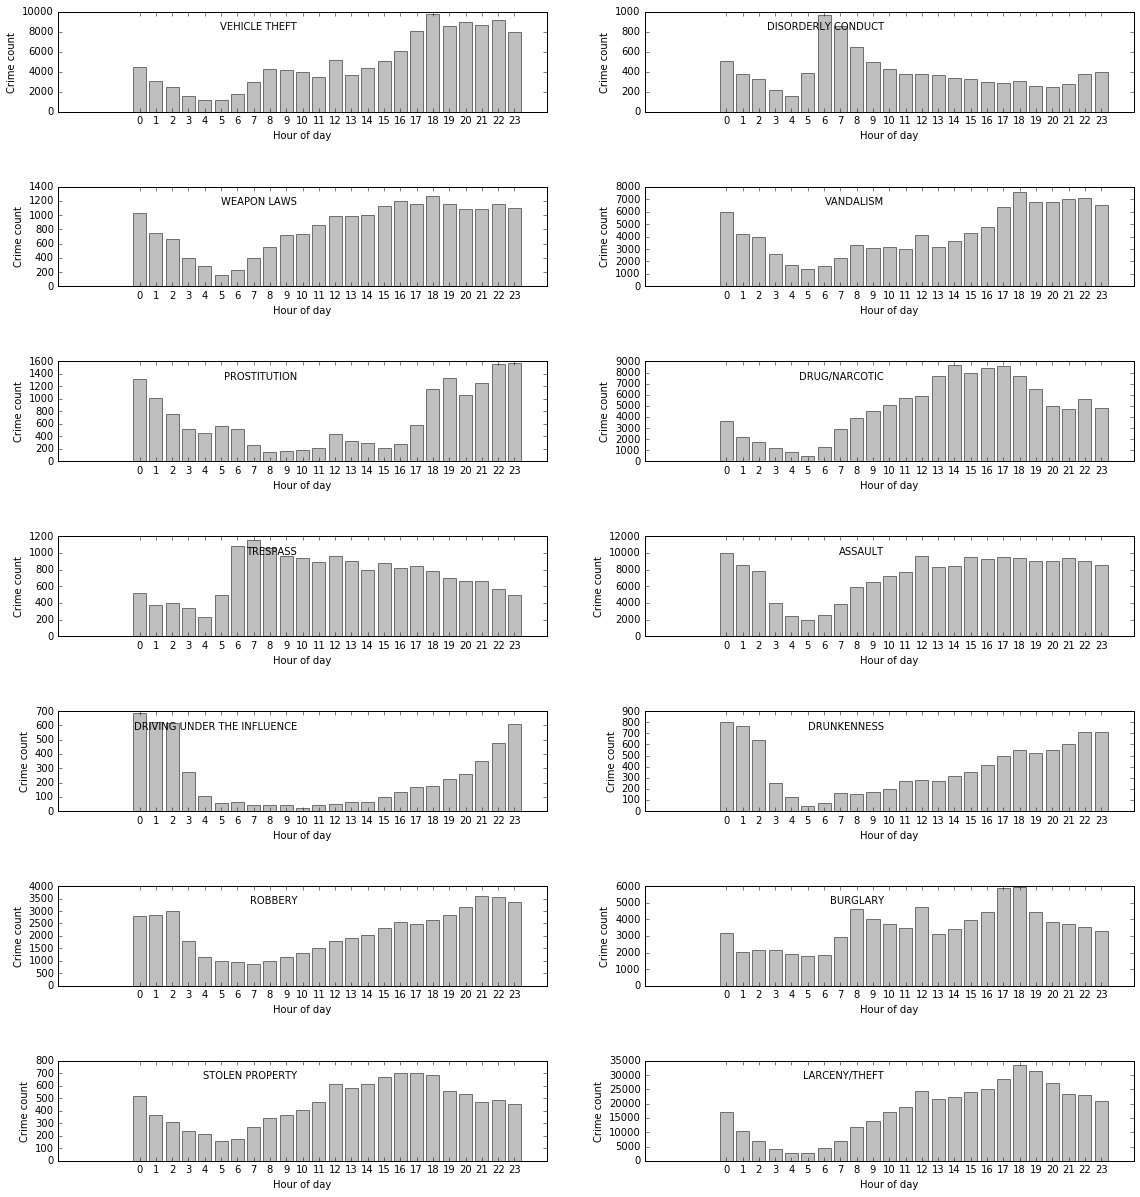

In [89]:
# Create 2 X 7 grid for the 14 crime subplots
# Run through each focus crime, aggregate data and plot on-the-fly

# Initialize variables
h_cnt = Counter()
temp_crime_h = []
plotVar = 1 # plotting variable, keeps track of subplot

# Run through each focus crime category
for crime in focuscrimes:
    # Make data structure with one crime category at a time
    temp_values = crime_data.loc[crime_data['Category'].isin([crime])]
    # Extract year per crime, add to list
    temp_crime_h = temp_values.Hour.tolist()
    #print len(temp_crime_h)
    # Count no of crimes for each year
    for h in temp_crime_h:
        h_cnt[h] += 1
    
    # Sort plot values
    labels, values = zip(*sorted(h_cnt.items()))
    indexes = np.arange(len(labels))
    
    # Add plot variables
    plt.subplot(7, 2, plotVar)
    plt.annotate(crime, xy=(1, 0), xycoords='axes fraction',
                 xytext=(-250, 80), textcoords='offset pixels',
                 horizontalalignment='right',verticalalignment='bottom') # Labels on each plot
    plt.bar(indexes, values, align='center', alpha=0.5, color='grey')
    
    # Plot the results
    plt.xticks(indexes, labels)
    plt.ylabel('Crime count')
    plt.xlabel('Hour of day')
    plt.subplots_adjust(bottom=.01, left=.01, right=2.5, top=4.0, hspace=.75)
    
    # Increment plot variable and reset counter
    plotVar += 1
    h_cnt.clear()
    
plt.show()


#### Comment on plot

**Quick 'facts'**
* Disorderly conduct is high in the morning
* Vehicle theft happens in the evening
* Narcotics peaks in the afternoon
* Driving under the influence is a night-time-thing
* Prostitution most commonly happen between 6PM and 12PM
* People are most ofen disturbed by disorderly conduct in the morning hours 6AM-9AM.
* Number of robbery increases throughout the day.  

**Theories**
* Stealing cars happens at night when it is darker and you will be less easy to recognize.
* Prostitution is for when you get home from work.

The peak of burglary, larceny/theft and vehicle theft, prostitution etc. around noon, I cannot explain.

### Crime per district

In [101]:
# List the 10 districts
crime_district = list(set(crime_data.PdDistrict))
crime_district = crime_district[1:]
crime_district


['CENTRAL',
 'NORTHERN',
 'SOUTHERN',
 'PARK',
 'MISSION',
 'TENDERLOIN',
 'RICHMOND',
 'TARAVAL',
 'INGLESIDE',
 'BAYVIEW']

In [102]:
# Initialize crime counters
dist_cnt_c = Counter()
dist_cnt_fc = Counter()
noOfCrimes = []
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']

# Crimes per district
for dist in crime_district:
    # Extracting district crimes
    crimes  = crime_data.loc[crime_data['PdDistrict'].isin([dist])]
    
    # Using the district crimes to extract the focus crimes
    fcrimes = crimes.loc[crimes['Category'].isin(focuscrimes)]  

    # Count no of crimes for each category
    dist_cnt_c[dist]  = len(crimes.Category.tolist())
    dist_cnt_fc[dist] = len(fcrimes.Category.tolist())

# Printing relevant information about district crime
print "Number of crimes: \n",             dist_cnt_c.items()
print "\nNumber of focus crimes:\n",      dist_cnt_fc.items()
print "\nMost number of crimes:\n",       dist_cnt_c.most_common(1)
print "\nMost number of focus crimes:\n", dist_cnt_fc.most_common(1)

Number of crimes: 
[('CENTRAL', 202673), ('NORTHERN', 247407), ('PARK', 115223), ('SOUTHERN', 365137), ('MISSION', 273802), ('TENDERLOIN', 180903), ('RICHMOND', 105546), ('TARAVAL', 152339), ('INGLESIDE', 179838), ('BAYVIEW', 204104)]

Number of focus crimes:
[('CENTRAL', 126203), ('NORTHERN', 157950), ('PARK', 63784), ('SOUTHERN', 209300), ('MISSION', 151904), ('TENDERLOIN', 102148), ('RICHMOND', 61690), ('TARAVAL', 84568), ('INGLESIDE', 99828), ('BAYVIEW', 107920)]

Most number of crimes:
[('SOUTHERN', 365137)]

Most number of focus crimes:
[('SOUTHERN', 209300)]


### Frequency of crimes in certain neigborhoods

**Getting the normalized version of the first histogram**

In [103]:
# Normalize all crime values
factor=1.0/sum(crime_count.itervalues())
p_crime = {k: v*factor for k, v in crime_count.iteritems()}
p_crime

{'ARSON': 0.0017410197373127318,
 'ASSAULT': 0.08766076311820631,
 'BAD CHECKS': 0.000440558409016795,
 'BRIBERY': 0.0003631030112389262,
 'BURGLARY': 0.041507212972249755,
 'DISORDERLY CONDUCT': 0.004727739343345965,
 'DRIVING UNDER THE INFLUENCE': 0.002618683129967691,
 'DRUG/NARCOTIC': 0.05683351480261454,
 'DRUNKENNESS': 0.0046562041033600355,
 'EMBEZZLEMENT': 0.0013586762132500039,
 'EXTORTION': 0.00033054214338326167,
 'FAMILY OFFENSES': 0.0005569881789249289,
 'FORGERY/COUNTERFEITING': 0.011031720698795693,
 'FRAUD': 0.01892033095655443,
 'GAMBLING': 0.00016083095334767656,
 'KIDNAPPING': 0.002505706785438188,
 'LARCENY/THEFT': 0.20873933693246038,
 'LIQUOR LAWS': 0.001971412544715692,
 'LOITERING': 0.0011751513216998945,
 'MISSING PERSON': 0.02936940945932679,
 'NON-CRIMINAL': 0.10710996150417396,
 'OTHER OFFENSES': 0.14165210883420748,
 'PORNOGRAPHY/OBSCENE MAT': 2.5160670615740812e-05,
 'PROSTITUTION': 0.007974452545741853,
 'RECOVERED VEHICLE': 0.0039773593432176945,
 'ROBBE

**Creating the ratio per district**

In this step I will create ``P(crime)``, ``P(crime|dist)`` and calculate ``P(crime|dist)/P(crime)`` within a for-loop. I have tried to make the code as self-explanatory as possible.

[Legend guide](http://matplotlib.org/users/legend_guide.html)

[Plotting in general](https://www.labri.fr/perso/nrougier/teaching/matplotlib/)

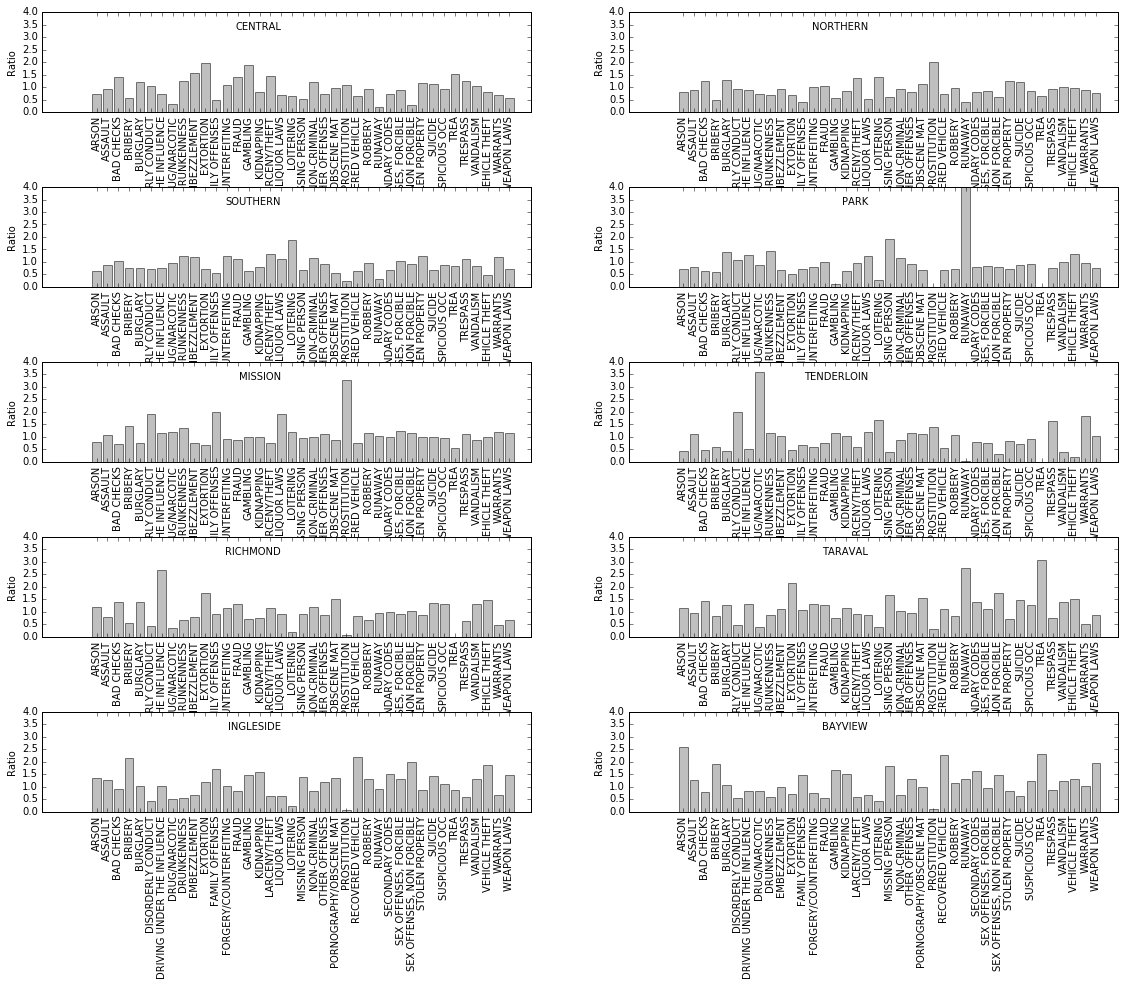

In [143]:
plotVar = 1
# Probability of each crime per district
p_crime_dist = {}
# For each district, calculate probability of seeing each crime
for dist in crime_district:
    # Extracting district crimes
    crimes = crime_data.loc[crime_data['PdDistrict'].isin([dist])]
    # For each district crime
    for crime in p_crime.keys():
        # Get number of crimes in all
        sumCrimes = len(crimes)
        # Calculate p(crime|dist)
        p_crime_dist[crime] = (1.0/sumCrimes) * len(crimes.loc[crimes['Category'].isin([crime])])
        # Calculate ratio P(crime|dist)/P(crime)
        p_crime_dist[crime] = p_crime_dist[crime] / p_crime_dist[crime]
        
    # Sort plot values
    labels, values = zip(*sorted(p_crime_dist.items()))
    indexes = np.arange(len(labels))
    
    # Add plot variables
    plt.subplot(7, 2, plotVar)
    plt.annotate(dist, xy=(1, 0), xycoords='axes fraction',
                 xytext=(-250, 80), textcoords='offset pixels',
                 horizontalalignment='right',verticalalignment='bottom') # Labels on each plot
    plt.bar(indexes, values, align='center', alpha=0.5, color='grey')
    
    # Axes and customizing plot
    plt.ylim(0, 4)
    plt.xticks(indexes, labels)
    plt.ylabel('Ratio')
    plt.subplots_adjust(bottom=.01, left=.01, right=2.5, top=4.0, hspace=.75)
    _, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    
    # Increment plot variable and reset counter
    plotVar += 1
    p_crime_dist.clear()
    
plt.show()

### Comments to the plots

* [Tenderloin](https://en.wikipedia.org/wiki/Tenderloin,_San_Francisco)
* [Mission](https://en.wikipedia.org/wiki/Mission_District,_San_Francisco)
* [Richmond](https://en.wikipedia.org/wiki/Richmond_District,_San_Francisco)

Additional...

## Geo-plotting the coordinate data!

I will be using the pandas dataframe as this is what I have been working with through all exercises.

In [ ]:
# Extract geo coordinates dataframe
geo_locations = crime_data[['X','Y']]
geo_locations.columns = ['lon','lat']
#geo_locations2 = geo_locations[:len(geo_locations)/2] # Working on a smaller dataset

In [ ]:
# Saving to CSV to check if it works better to load
geo_locations.to_csv('geo_data.csv', sep=',', encoding='utf-8')

In [ ]:
# Get values in dict form
geo_dict = geo_locations.to_dict()
#geo_dict.keys()

In [ ]:
# Plotting the data w. geoplotlib
#gpl.dot(geo_dict,color='b',point_size=1)
gpl.dot(geo_locations,color='b',point_size=1)
#bbox = BoundingBox(north=max(location_dict['lat']), west=min(location_dict['lon']), south=max(location_dict['lat']), east=min(location_dict['lon']))
#gpl.set_bbox(bbox)
gpl.show()

In [ ]:
from geoplotlib.utils import read_csv

# Reading in entire file and changing names of relevant columns
data2 = read_csv('geo_data.csv')
#data = read_csv('bus.csv')
gpl.dot(data2)
gpl.show()

# Week 4

In [13]:
# Getting relevant packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import urllib2
from collections import Counter 
import numpy as np
from operator import itemgetter
from scipy import linalg
import geoplotlib as gpl
from geoplotlib.utils import BoundingBox
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [22]:
# Importing data using pandas
crime_data = pd.read_csv('SFPD_Incidents_Jan_2003.csv') # Updated 20th of February
# READ IN ONLY NEEDED COLUMNS 
#data = pd.read_csv("sfpd_dataset.csv",usecols=["X","Y","Category"])
crime_types = ['PROSTITUTION', 'DRUG/NARCOTIC', 'DRIVING UNDER THE INFLUENCE']

In [25]:
# Extracting focus crimes

for crime in crime_types:
    f_crime = crime_data.loc[crime_data['Category'].isin([crime])] 
    
    # Choosing columns for plotting 
    plot_data = {}
    plot_data = f_crime[['Y','X']]
    plot_data.columns = ['lat','lon']

    # Convert dataframe to dict
    for col in plot_data.columns:
        plot_data_d[col] = plot_data[col].tolist()
    #plot_data_d
    
    # Printing basic info, crime type and number of crimes
    print "Crime:           ", crime, "\nNumber of crimes:", len(f_crime)
    # Plotting the data w. geoplotlib
    gpl.kde(plot_data_d, bw=5, cut_below=2e-4)
    gpl.set_bbox(BoundingBox(north=37.825, west=-122.45, south=37.69, east=-122.43))
    gpl.inline()

Crime:            PROSTITUTION 
Number of crimes: 16164
('smallest non-zero count', 1.4329573088768091e-09)
('max count:', 17.07913300884822)


Crime:            DRUG/NARCOTIC 
Number of crimes: 115200
('smallest non-zero count', 7.1647865443840454e-10)
('max count:', 103.75160624440464)


Crime:            DRIVING UNDER THE INFLUENCE 
Number of crimes: 5308
('smallest non-zero count', 7.1647865443840454e-10)
('max count:', 0.77807101502347986)


### K nearest neighbour

In [19]:
from sklearn.neighbors import KNeighborsClassifier
import pylab as pl
from sklearn import neighbors, datasets

### The unbalanced dataset

In [26]:
# Extract focuscrimes
unbalanced_crime = crime_data.loc[crime_data['Category'].isin(crime_types)]

### The balanced dataset

In [90]:
# Initialize new dataframe with same columns as unbalanced_crime
balanced_crime = pd.DataFrame(columns=unbalanced_crime.columns)

# For each crime type find 5000 values and created new balanced dataset
for category in crime_types:
    temp = crime_data.loc[crime_data['Category'].isin([category])]
    balanced_crime = pd.concat([balanced_crime,temp.sample(n=5000, axis=0)])
# Removing outlier datapoints
balanced_crime = balanced_crime[balanced_crime['Y'] < 90]

In [80]:
# printing the number of observation to check correctness
print "DRUG/NARCOTIC              ", len(balanced_crime[balanced_crime['Category'].isin(['DRUG/NARCOTIC'])])
print "PROSTITUTION               ", len(balanced_crime[balanced_crime['Category'].isin(['PROSTITUTION'])])
print "DRIVING UNDER THE INFLUENCE", len(balanced_crime[balanced_crime['Category'].isin(['DRIVING UNDER THE INFLUENCE'])])

DRUG/NARCOTIC               5000
PROSTITUTION                4999
DRIVING UNDER THE INFLUENCE 5000


Only plotting when using the balanced dataset.

In [81]:
# Create X and Y vector
# Choosing columns for plotting 
plot_data = {}
plot_data = balanced_crime[['Y','X']]
plot_data.columns = ['lat','lon']

In [82]:
# Create list of lists with each [lon,lat] pairs as X
# Getting the full matrix of variables
Xtuple = zip( plot_data['lat'], plot_data['lon'])
X = np.array([list(elem) for elem in Xtuple])

In [83]:
# Encoding categorical data - only one variable - the categories
labelencoder_y = LabelEncoder()
# Get attributes
categorical = balanced_crime[['IncidntNum','Category']]

# Get labels for values 
Y = categorical.iloc[:,:].values
Y[:,1] = labelencoder_y.fit_transform(Y[:,1])
Y = Y[:,1].tolist()

In [95]:
# Initialize plotting variables
k_neighbors = [5, 50, 100, 200] # Number of neigbours
h = 0.002 # step size in mesh 
col = ['b', 'g', 'r']

# Definition of grid boundaries
x_min, x_max = plot_data.min()[0] - .05, plot_data.max()[0] + .05
y_min, y_max = plot_data.min()[1] - .05, plot_data.max()[1] + .05

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

### Plotting the KNN-result for different values of ``k``

In [96]:
# Fit the values
for k in k_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,Y)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) # reshape Z to a matrix
    
    for i in xrange(len(crime_types)):
        pred = {"lat" : xx[np.where(Z == i)], "lon" : yy[np.where(Z == i)]}
        gpl.set_bbox(BoundingBox(north=37.825, west=-122.45, south=37.69, east=-122.43))
        gpl.dot(pred, color=col[i], point_size=2)
    
    print "KNN plot where k=%d" % (k)
    gpl.inline()

KNN plot where k=5


KNN plot where k=50


KNN plot where k=100


KNN plot where k=200


In this plot, the blue represents the drunk driving, green the drugs and red the prosititution. As k increases, the different areas get more and more separated into smaller areas, not very sporadic as in the first plot.